In [204]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import pulp
import importlib
import matplotlib.pyplot as plt
import time as time

In [205]:
import GGM_sampler
import GGM_inference
import GGM_diagnostics
import J_sampler
import J_inference
import J_diagnostics

In [206]:
importlib.reload(GGM_inference)
importlib.reload(GGM_diagnostics)
importlib.reload(GGM_sampler)
importlib.reload(J_inference)
importlib.reload(J_diagnostics)
importlib.reload(J_sampler)

<module 'J_sampler' from '/Users/lucaraffo/Desktop/final/J_sampler.py'>

In [207]:
n_spins = 10
n_samples = 800

In [208]:
J_precision = GGM_sampler.precision_maker(n_spins, seed = 9)

In [209]:
samples = GGM_sampler.precision_sampler_sign(J_precision, n_samples)

In [210]:
histogram = J_sampler._samples_to_histogram(samples)

λ = 0.087183  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.027993  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.02027  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.016686  (reg = 0.1)
[1/10] reconstruction sp

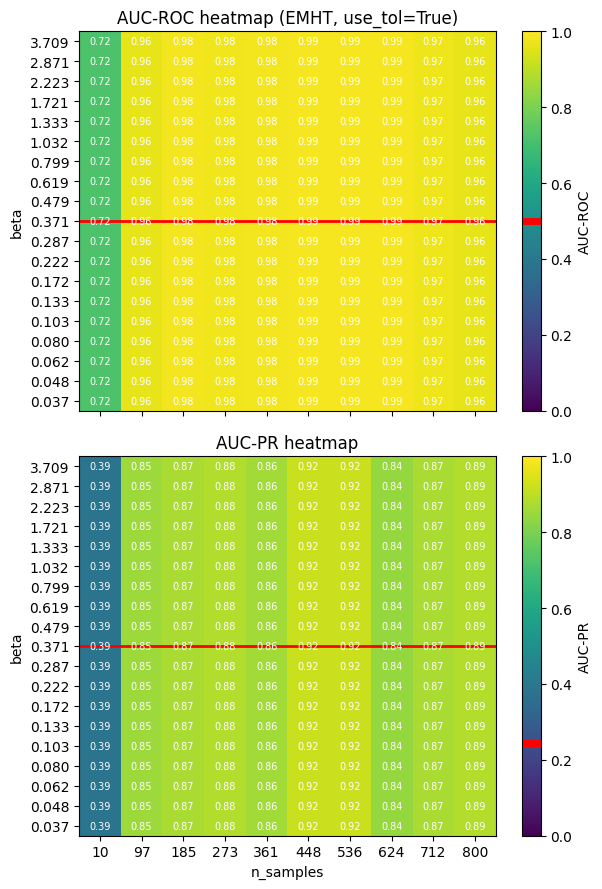

1303.112762928009


In [211]:
start_time = time.time()

J_diagnostics.complete_experiment(J_precision, n_samples, "EMHT", isingzation = True)

end_time = time.time()

print(end_time - start_time)

λ = 0.087183  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.027993  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.02027  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.016686  (reg = 0.1)
[1/10] reconstruction sp

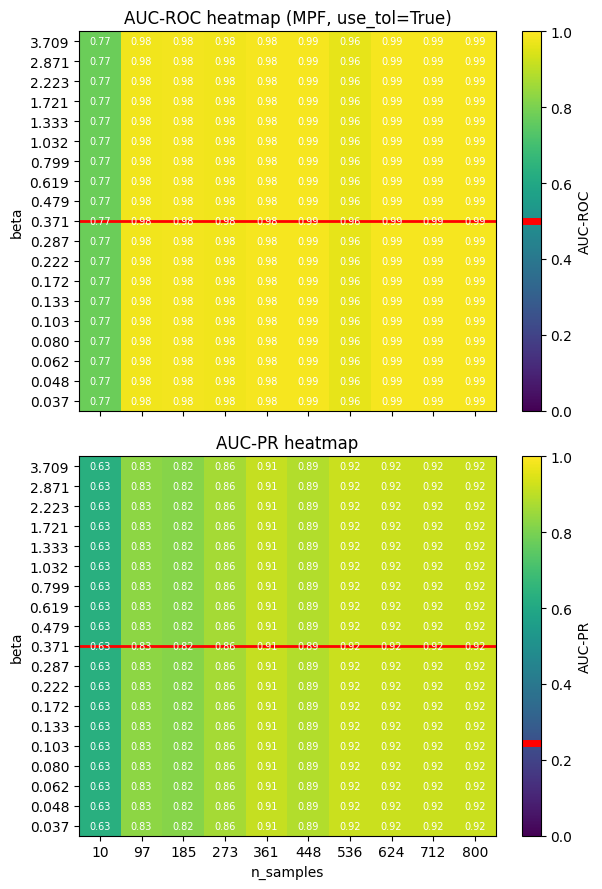

4376.865628957748


In [212]:
start_time = time.time()

J_diagnostics.complete_experiment(J_precision, n_samples, "MPF", isingzation = True)

end_time = time.time()

print(end_time - start_time)

In [ ]:
start_time = time.time()

J_diagnostics.complete_experiment(J_precision, n_samples, "RPLE", isingzation = True)

end_time = time.time()

print(end_time - start_time)

λ = 0.087183  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.027993  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.02027  (reg = 0.1)
[1/10] reconstruction spin 0
[2/10] reconstruction spin 1
[3/10] reconstruction spin 2
[4/10] reconstruction spin 3
[5/10] reconstruction spin 4
[6/10] reconstruction spin 5
[7/10] reconstruction spin 6
[8/10] reconstruction spin 7
[9/10] reconstruction spin 8
[10/10] reconstruction spin 9
λ = 0.016686  (reg = 0.1)
[1/10] reconstruction sp

In [ ]:
start_time = time.time()

J_diagnostics.complete_experiment(J_precision, n_samples, "logRISE", isingzation = True)

end_time = time.time()

print(end_time - start_time)

In [ ]:
start_time = time.time()

J_diagnostics.complete_experiment(J_precision, n_samples, "RM", isingzation = True)

end_time = time.time()

print(end_time - start_time)